In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline  
import random
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

###### Consider a region with 10,000 inhabitants, where 1% of them are from a specific religion and the rest are atheists/agnostics. At each generation, we randomly pair men and women of this region. Let's say at first, that 15% of the women simply don’t get married. Of the ones that does, if a Religious woman is sampled with a Religious man, they have an 80% chance of getting married. If a non-Religious woman is sampled with a non-Religious man, they have a 65% chance of getting married, and interfaith couples have a 30% chance of getting married.

Side note: The numbers weren't made to sum up to 1, they are not drawing from the same probability distribution since the distribution of religions are different. What it means is that, due to cultural reasons, that out of 100 religious men, a religious woman could eventually marry 80 of them, out of 100 non-religious men, a religous woman could eventually marry 30 of them.

At the same time, at each generation, non-Religious immigrants are getting into the country. Starting with 3,000 immigrants, this number increases by 10% at each generation.

After we sample the married couples we simulate their number of children. The distribution of children depends on the wife’s religion. Religious wives have an average of 5 children, while non-Religious have an average of 3 children (both with a standard deviation of 2).


In [3]:
def simulate_society(generations=10, n_individuals=1000, percentage_religion=0.01, immigrant_population=3000, intrafaith_marriage_prob = 0.3, single_woman_prob = 0.15, avg_children=3, avg_children_religion=5, std_dev_children=2):
    n_religion = int(percentage_religion*n_individuals)
    male_pop = ["n"]*(n_individuals-n_religion)+["r"]*n_religion
    female_pop = ["n"]*(n_individuals-n_religion)+["r"]*n_religion
    religion_count = [percentage_religion]
    for generation in range(generations):
        print ("Generation: ", generation)
        random.shuffle(male_pop)
        random.shuffle(female_pop)
        
        prob_daughter = 0.5
        new_male_pop = []
        new_female_pop = []
        
        couples = []
        single_man = male_pop

        for k in range(len(female_pop)):
            marriage = False
            while not marriage and len(single_man) > 0:
                husband_index = random.randint(0,len(single_man)-1)

                prob_marriage = 0.65
                if female_pop[k][-1] == 'r' and single_man[husband_index][-1] == 'r':
                    prob_marriage = 0.8
                elif (female_pop[k][-1] == 'r' and single_man[husband_index][-1] != 'r') or female_pop[k][-1] != 'r' and single_man[husband_index][-1] == 'r':
                    prob_marriage = intrafaith_marriage_prob
                
                single_woman_prob = single_woman_prob
                if random.random() < single_woman_prob:
                    break

                marriage = random.random() < prob_marriage

                if marriage:
                    couples.append([female_pop[k], single_man[husband_index]])
                    single_man.remove(single_man[husband_index])


        for couple in couples:
            number_of_children = max(int(np.random.normal((avg_children,avg_children_religion)[couple[0][-1]=='r'],
                                                                              std_dev_children)),0)
            children_religion = couple[0][-1]
#             children_religion = ['n','r'][couple[0][-1] == 'r' or couple[1][-1] == 'r']
            
            for j in range(number_of_children):
                if random.random() > prob_daughter:
                    new_female_pop.append(couple[0]+children_religion)
                else:
                    new_male_pop.append(couple[0]+children_religion)

          
        male_pop = new_male_pop+["n"]*int(0.5*immigrant_population*(1.1**generation))
        female_pop = new_female_pop+["n"]*int(0.5*immigrant_population*(1.1**generation))
        
        current_pop = [man[-1] for man in male_pop+female_pop]
        # print ("religion %:", current_pop.count('r')/float(len(current_pop)))
        religion_count.append(100*current_pop.count('j')/float(len(current_pop)))

    return male_pop, female_pop, religion_count

###### The question is, at what generation are the Religious people a majority of the population?

Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
1475333


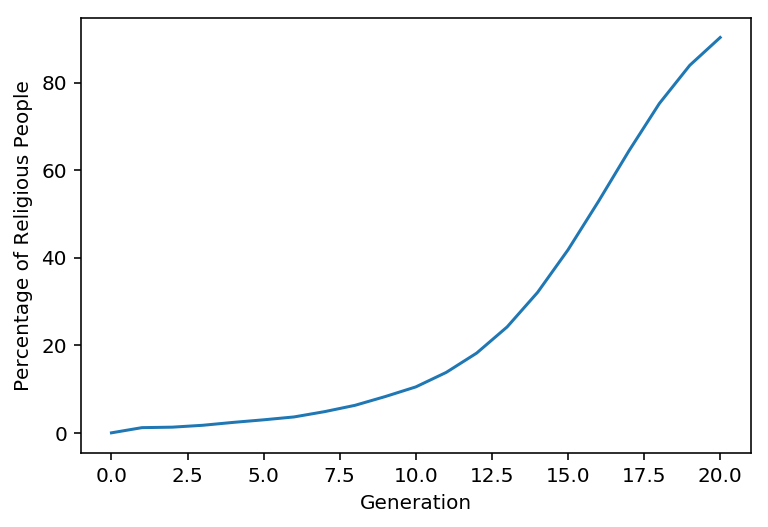

In [5]:
male_pop, female_pop, religion_count = simulate_society(generations=20, n_individuals=10000)

current_pop = [man[-1] for man in male_pop+female_pop]
print (len(current_pop))

plt.plot(range(len(religion_count)), religion_count, label='Percentage of Religious People')
# plt.legend(loc='upper left')
plt.xlabel("Generation")
plt.ylabel("Percentage of Religious People")
plt.show()

In this model, by the 16th generation the Religious people achieve the majority. But maybe we are overestimating the probability of interfaith marriage (for example, according to Wikipedia, nowadays, nearly 50% of Jews are married to non-Jewish people, but at the 19th century this number was nearly 10%). 

So let’s simulate this model again while changing the probability of interfaith marriage. At the same time, let’s increase the probability of a person not getting married to 25%. The following plot is the percentage of Religious people at the end of the 20th generation:

In [15]:
intra_faith_probs = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4]
final_percentage = []
for k in intra_faith_probs:
    print (k)
    male_pop, female_pop, religion_count = simulate_society(generations=20, n_individuals=10000, intrafaith_marriage_prob=k, single_woman_prob = 0.20)
    final_percentage.append(religion_count[-1])

0.05
Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
0.1
Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
0.2
Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
0.25
Generation:  0
Generation:  1
Generation:  2
Generat

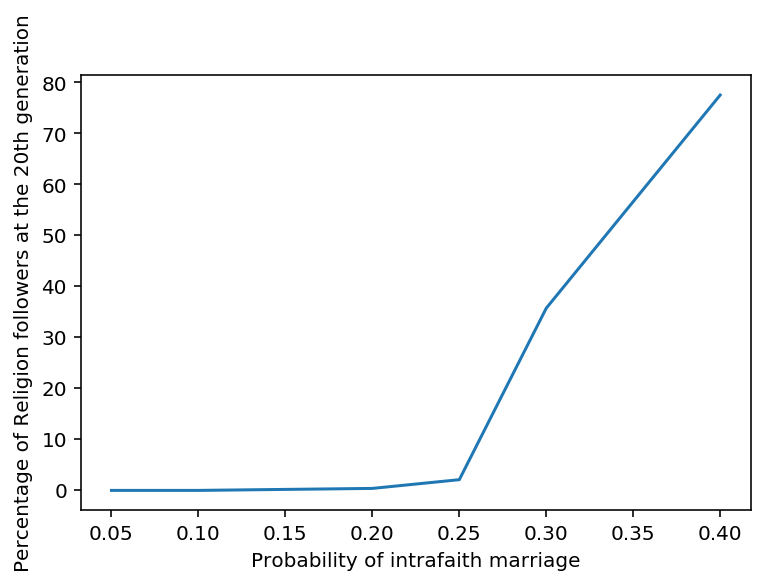

In [16]:
plt.plot(intra_faith_probs, final_percentage, label='Percentage of Religious People')
# plt.legend(loc='upper left')
plt.xlabel("Probability of intrafaith marriage")
plt.ylabel("Percentage of Religion followers at the 20th generation")
plt.show()

As you can see, if the religion becomes a little bit tolerant with intrafaith marriage, they'll have the majority after a few generations.

Let's see how this tolerance determines the time that they have the majority.